## Задача 1 (№17.82) : метод касательных для одномерной оптимизации

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Функция, которую нужно оптимировать
def f(x):
    return (x - 4) ** 2 + np.log(x)

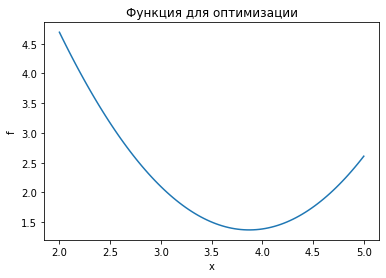

In [9]:
# Убедимся, что функция выпуклая
xx = np.linspace(2,5,100) # По условию задания, нужно решить на отрезке [3,4], а тут мы просто строим f на [2,5]
plt.plot(xx,f(xx))
plt.xlabel("x")
plt.ylabel("f")
plt.title("Функция для оптимизации")
plt.show()

In [10]:
# f'(x)
def df(x,h=1e-5):
    return (f(x+h) - f(x)) / h

## f''(x)
def d2f(x,h=1e-5):
    return (f(x+2*h) + f(x) - 2*f(x+h)) / (h**2)

x_min = 3.870824861704184 f_min = f(x_min) = 1.3701538432430063.


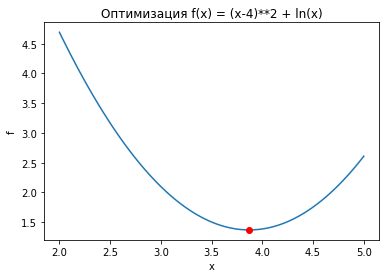

In [15]:
epsilon = 0.01

x = 3.0
while np.abs(df(x)) > epsilon:
    x = x - df(x) / d2f(x)
print(f"x_min = {x} f_min = f(x_min) = {f(x)}.")

xx = np.linspace(2,5,100) # По условию задания, нужно решить на отрезке [3,4], а тут мы просто строим f на [2,5]
plt.plot(xx,f(xx))
plt.plot([x],[f(x)],'or')
plt.xlabel("x")
plt.ylabel("f")
plt.title("Оптимизация f(x) = (x-4)**2 + ln(x)")
plt.show()

## Задача 2 (№17.158) : метод сопряженных градиентов для безусловной многомерной оптимизации

$$f(x) = x_1^2 + e^{x_1^2 + x_2^2} + 4x_1 + 3x_2 \rightarrow min_x$$

In [35]:
def f(x):
    return x[0] ** 2 + np.exp(x[0]**2 + x[1]**2) + 4*x[0] + 3*x[1]

In [37]:
xx = np.linspace(-2,0,100)
yy = np.linspace(-1,1,100)
X, Y = np.meshgrid(xx, yy)
zz = f([X,Y])

In [40]:
zz

array([[141.4131591 , 129.94823681, 119.47304883, ...,  -0.43726066,
         -0.36100851,  -0.28171817],
       [135.65498391, 124.6395787 , 114.57513564, ...,  -0.48340342,
         -0.40702065,  -0.32768681],
       [130.23681761, 119.64466284, 109.96696364, ...,  -0.52330853,
         -0.44680277,  -0.36742796],
       ...,
       [135.99439337, 125.4022386 , 115.7245394 , ...,   5.23426723,
          5.31077299,   5.39014779],
       [141.53377179, 130.51836658, 120.45392352, ...,   5.39538446,
          5.47176722,   5.55110107],
       [147.4131591 , 135.94823681, 125.47304883, ...,   5.56273934,
          5.63899149,   5.71828183]])

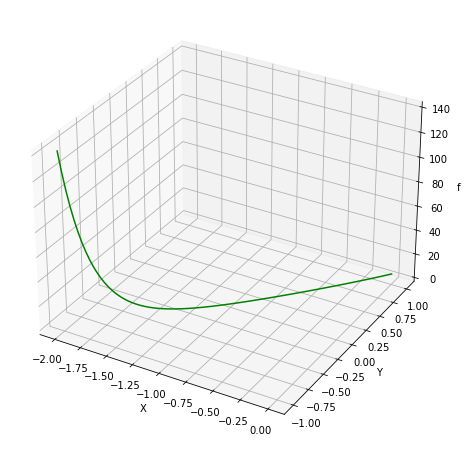

In [41]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
#ax.contour3D(X,Y,zz,100)
ax.plot3D(xx,yy,f([xx,yy]),color="Green")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')
plt.show()

In [33]:
def f_grad(x):
    h=1e-5
    
    df1 = (f([x[0]+h,x[1]]) - f([x[0],x[1]])) / h
    df2 = (f([x[0],x[1]+h]) - f([x[0],x[1]])) / h
    return np.array([df1,df2])

In [42]:
f_grad([0,0])

array([4.00002, 3.00001])

In [31]:
def phi(alpha):
    return f(xk + alpha * pk)

def derphi(alpha):
    return np.dot(f_grad(xk + alpha * pk), pk)